In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.insert(0, '../scripts/')

Import packages

In [3]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from pathlib import Path
%matplotlib inline

Initalize configs

In [4]:
pwd = Path().cwd()
root_dir = pwd.parent
data_dir = root_dir / "data"
file_path = data_dir / "volume_per_user.csv"

# sets global styling for graphs
plt.style.use('seaborn')

# to convert the scientific notation to decimal format
# pd.set_option('display.float_format', lambda x: '%.2f' % x)

# reset the decimal format back to scientific notation
# pd.reset_option('display.float_format')

In [5]:
data = pd.read_csv(file_path, dtype={"MSISDN/Number": str})

In [6]:
volume_per_user = data.copy()

### Top 10 Customer Engagement By Session
---

In [7]:
top_10_customers_per_session_engagement = volume_per_user.sort_values(by=["Session Count"], ascending=False)[:10]
top_10_customers_per_session_engagement

,MSISDN/Number,Session Count,Dur. (s),Total Data Transferred,Google Volume (Bytes),Netflix Volume (Bytes),Youtube Volume (Bytes),Gaming Volume (Bytes),Email Volume (Bytes),Social Media Volume (Bytes),Other Volume (Bytes)
13468,33626320676.0,18,8791927.0,7.971167e+09,152191852.0,328725740.0,374483047.0,6.887572e+09,42418782.0,43374779.0,8.167878e+09
13124,33625779332.0,17,18553754.0,8.499621e+09,142307915.0,356980607.0,452958769.0,7.326673e+09,40633966.0,27135500.0,6.354583e+09
6405,33614892860.0,17,9966898.0,8.846226e+09,127973787.0,361401046.0,394370218.0,7.749432e+09,40788634.0,28294544.0,7.639264e+09
36910,33659725664.0,16,4035428.0,7.705863e+09,116516345.0,399519079.0,257991088.0,6.725559e+09,35999792.0,35412358.0,6.317415e+09
92586,33760536639.0,15,9279434.0,8.514774e+09,123223099.0,334643269.0,396289198.0,7.461045e+09,33693767.0,39783189.0,4.716134e+09
76078,33675877202.0,15,4865947.0,7.891111e+09,109860502.0,309093159.0,317410572.0,6.970568e+09,31514421.0,19222921.0,6.798515e+09
64884,33667163239.0,13,8744914.0,5.618394e+09,105032696.0,313939488.0,315231310.0,4.725622e+09,30335796.0,24247850.0,4.941519e+09
105758,33786323068.0,12,4059652.0,5.622232e+09,110254484.0,305939790.0,214763912.0,4.851096e+09,36310123.0,23974919.0,4.252487e+09
1271,33604515716.0,12,5207990.0,5.487855e+09,83815037.0,265374262.0,179686748.0,4.846663e+09,23854429.0,18476523.0,4.129943e+09
92241,33760413819.0,12,5321667.0,7.132371e+09,82738720.0,318347546.0,303169107.0,6.268620e+09,25576965.0,20777205.0,4.101645e+09


In [8]:
top_10_customers_per_session_engagement[["MSISDN/Number", "Session Count", "Dur. (s)", "Total Data Transferred"]]

,MSISDN/Number,Session Count,Dur. (s),Total Data Transferred
13468,33626320676.0,18,8791927.0,7.971167e+09
13124,33625779332.0,17,18553754.0,8.499621e+09
6405,33614892860.0,17,9966898.0,8.846226e+09
36910,33659725664.0,16,4035428.0,7.705863e+09
92586,33760536639.0,15,9279434.0,8.514774e+09
76078,33675877202.0,15,4865947.0,7.891111e+09
64884,33667163239.0,13,8744914.0,5.618394e+09
105758,33786323068.0,12,4059652.0,5.622232e+09
1271,33604515716.0,12,5207990.0,5.487855e+09
92241,33760413819.0,12,5321667.0,7.132371e+09


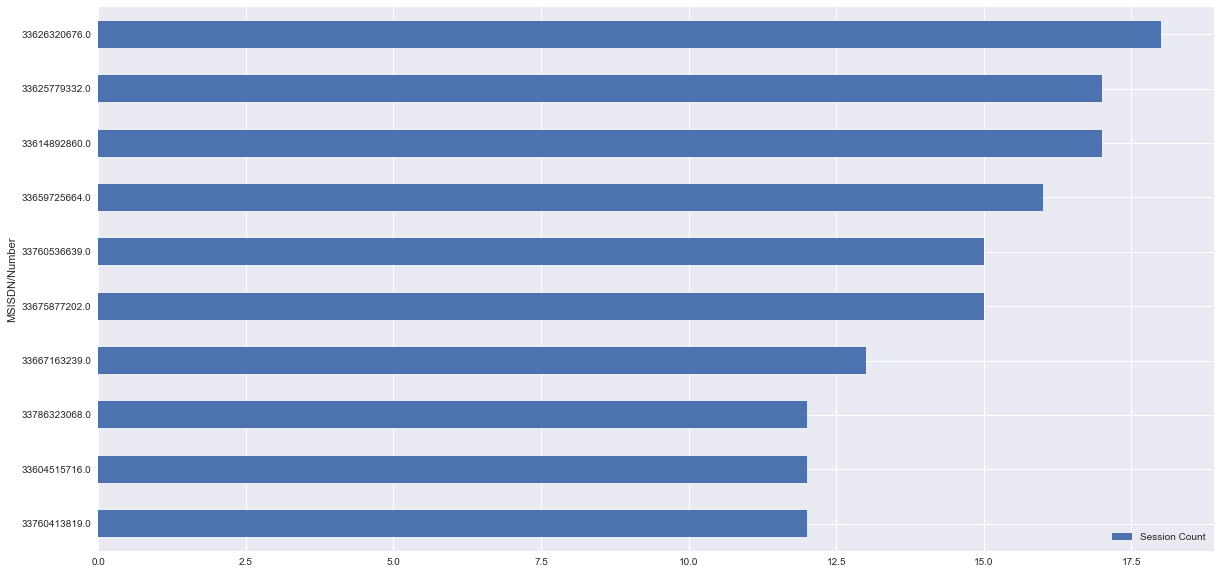

In [9]:
top_10_customers_per_session_engagement.plot(kind="barh", x="MSISDN/Number", y="Session Count", figsize=(20, 10)).invert_yaxis()

### Top 10 Customer Engagement By Duration
---

In [10]:
top_10_customers_per_duration_engagement = volume_per_user.sort_values(by=["Dur. (s)"], ascending=False)[:10]
top_10_customers_per_duration_engagement

,MSISDN/Number,Session Count,Dur. (s),Total Data Transferred,Google Volume (Bytes),Netflix Volume (Bytes),Youtube Volume (Bytes),Gaming Volume (Bytes),Email Volume (Bytes),Social Media Volume (Bytes),Other Volume (Bytes)
13124,33625779332.0,17,18553754.0,8.499621e+09,142307915.0,356980607.0,452958769.0,7.326673e+09,40633966.0,27135500.0,6.354583e+09
6405,33614892860.0,17,9966898.0,8.846226e+09,127973787.0,361401046.0,394370218.0,7.749432e+09,40788634.0,28294544.0,7.639264e+09
92586,33760536639.0,15,9279434.0,8.514774e+09,123223099.0,334643269.0,396289198.0,7.461045e+09,33693767.0,39783189.0,4.716134e+09
13468,33626320676.0,18,8791927.0,7.971167e+09,152191852.0,328725740.0,374483047.0,6.887572e+09,42418782.0,43374779.0,8.167878e+09
64884,33667163239.0,13,8744914.0,5.618394e+09,105032696.0,313939488.0,315231310.0,4.725622e+09,30335796.0,24247850.0,4.941519e+09
50097,33662840755.0,9,6614270.0,4.000098e+09,63963503.0,184267814.0,262998846.0,3.351103e+09,17891599.0,17463934.0,3.995786e+09
56952,33664693736.0,9,6288730.0,5.682007e+09,73583110.0,261564558.0,205367769.0,5.008820e+09,17579618.0,17185041.0,4.960858e+09
659,33603127838.0,12,6287761.0,4.976195e+09,86929016.0,260488421.0,284090139.0,4.191445e+09,26198895.0,23077825.0,6.326671e+09
65788,33667456716.0,6,5649882.0,2.600522e+09,39433670.0,174043458.0,145638923.0,2.158159e+09,20038064.0,7784073.0,2.832421e+09
92241,33760413819.0,12,5321667.0,7.132371e+09,82738720.0,318347546.0,303169107.0,6.268620e+09,25576965.0,20777205.0,4.101645e+09


In [11]:
top_10_customers_per_duration_engagement[["MSISDN/Number", "Session Count", "Dur. (s)", "Total Data Transferred"]]

,MSISDN/Number,Session Count,Dur. (s),Total Data Transferred
13124,33625779332.0,17,18553754.0,8.499621e+09
6405,33614892860.0,17,9966898.0,8.846226e+09
92586,33760536639.0,15,9279434.0,8.514774e+09
13468,33626320676.0,18,8791927.0,7.971167e+09
64884,33667163239.0,13,8744914.0,5.618394e+09
50097,33662840755.0,9,6614270.0,4.000098e+09
56952,33664693736.0,9,6288730.0,5.682007e+09
659,33603127838.0,12,6287761.0,4.976195e+09
65788,33667456716.0,6,5649882.0,2.600522e+09
92241,33760413819.0,12,5321667.0,7.132371e+09


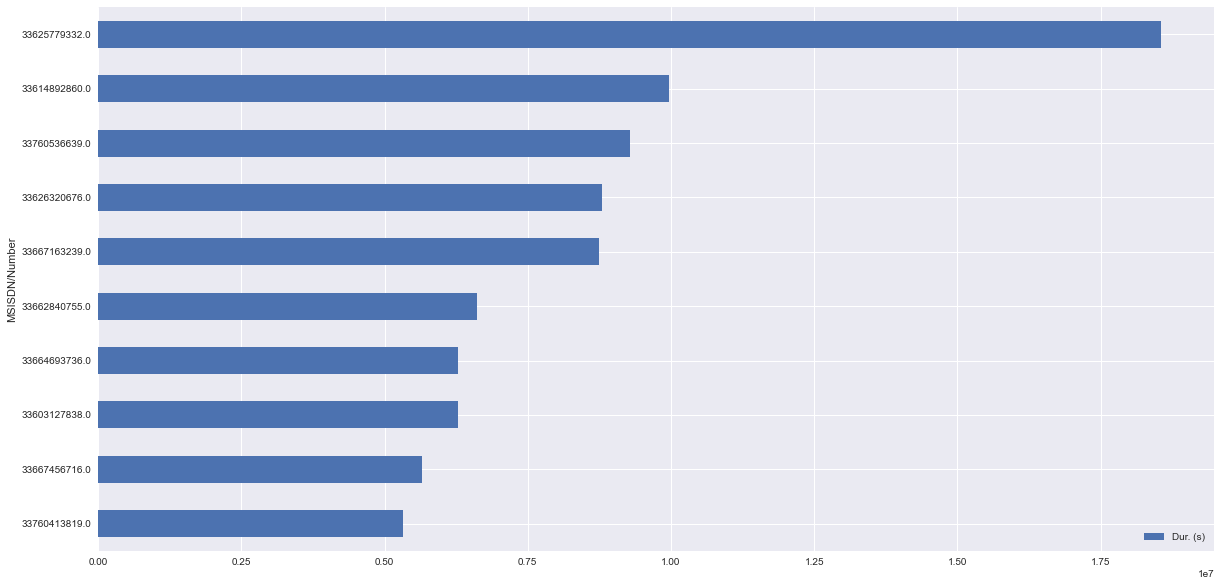

In [12]:
top_10_customers_per_duration_engagement.plot(kind="barh", x="MSISDN/Number", y="Dur. (s)", figsize=(20, 10)).invert_yaxis()

### Top 10 Customer Engagement By Total Data Transferred
---

In [13]:
top_10_customers_per_data_engagement = volume_per_user.sort_values(by=["Total Data Transferred"], ascending=False)[:10]
top_10_customers_per_data_engagement

,MSISDN/Number,Session Count,Dur. (s),Total Data Transferred,Google Volume (Bytes),Netflix Volume (Bytes),Youtube Volume (Bytes),Gaming Volume (Bytes),Email Volume (Bytes),Social Media Volume (Bytes),Other Volume (Bytes)
6405,33614892860.0,17,9966898.0,8.846226e+09,127973787.0,361401046.0,394370218.0,7.749432e+09,40788634.0,28294544.0,7.639264e+09
92586,33760536639.0,15,9279434.0,8.514774e+09,123223099.0,334643269.0,396289198.0,7.461045e+09,33693767.0,39783189.0,4.716134e+09
13124,33625779332.0,17,18553754.0,8.499621e+09,142307915.0,356980607.0,452958769.0,7.326673e+09,40633966.0,27135500.0,6.354583e+09
13468,33626320676.0,18,8791927.0,7.971167e+09,152191852.0,328725740.0,374483047.0,6.887572e+09,42418782.0,43374779.0,8.167878e+09
76078,33675877202.0,15,4865947.0,7.891111e+09,109860502.0,309093159.0,317410572.0,6.970568e+09,31514421.0,19222921.0,6.798515e+09
36910,33659725664.0,16,4035428.0,7.705863e+09,116516345.0,399519079.0,257991088.0,6.725559e+09,35999792.0,35412358.0,6.317415e+09
62805,33666464084.0,11,4536757.0,7.308501e+09,89320737.0,214416926.0,227336012.0,6.646303e+09,25557139.0,18629986.0,4.349141e+09
92241,33760413819.0,12,5321667.0,7.132371e+09,82738720.0,318347546.0,303169107.0,6.268620e+09,25576965.0,20777205.0,4.101645e+09
57033,33664712899.0,11,2927785.0,6.872018e+09,90389372.0,251798809.0,276834013.0,6.103856e+09,21426007.0,19390599.0,3.976960e+09
86139,33698792269.0,11,5169128.0,6.540899e+09,79736125.0,268247480.0,302661958.0,5.753743e+09,29059042.0,15728161.0,4.689876e+09


In [14]:
top_10_customers_per_data_engagement[["MSISDN/Number", "Session Count", "Dur. (s)", "Total Data Transferred"]]

,MSISDN/Number,Session Count,Dur. (s),Total Data Transferred
6405,33614892860.0,17,9966898.0,8.846226e+09
92586,33760536639.0,15,9279434.0,8.514774e+09
13124,33625779332.0,17,18553754.0,8.499621e+09
13468,33626320676.0,18,8791927.0,7.971167e+09
76078,33675877202.0,15,4865947.0,7.891111e+09
36910,33659725664.0,16,4035428.0,7.705863e+09
62805,33666464084.0,11,4536757.0,7.308501e+09
92241,33760413819.0,12,5321667.0,7.132371e+09
57033,33664712899.0,11,2927785.0,6.872018e+09
86139,33698792269.0,11,5169128.0,6.540899e+09


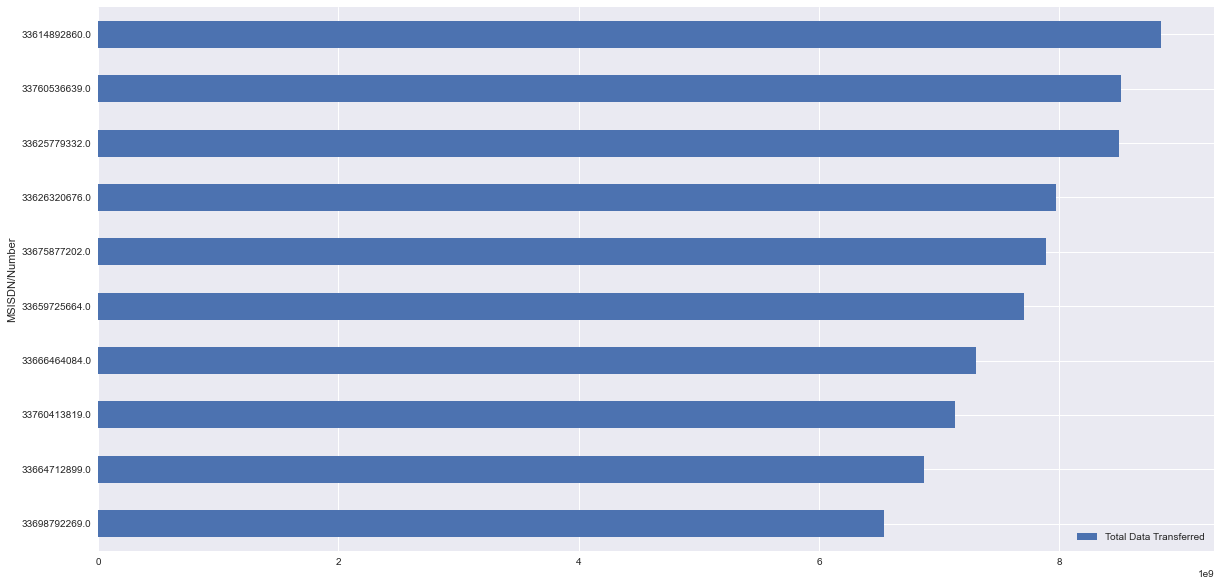

In [15]:
top_10_customers_per_data_engagement.plot(kind="barh", x="MSISDN/Number", y="Total Data Transferred", figsize=(20, 10)).invert_yaxis()

### K-means
---

In [16]:
scaler = MinMaxScaler()

In [17]:
df_norm = pd.DataFrame(scaler.fit_transform(volume_per_user.select_dtypes(include=np.number)), columns=volume_per_user.select_dtypes(include=np.number).columns)

In [18]:
df_norm.head()

,Session Count,Dur. (s),Total Data Transferred,Google Volume (Bytes),Netflix Volume (Bytes),Youtube Volume (Bytes),Gaming Volume (Bytes),Email Volume (Bytes),Social Media Volume (Bytes),Other Volume (Bytes)
0,0.0,0.046922,0.022566,0.068342,0.066129,0.026234,0.022937,0.035438,0.016454,0.057590
1,0.0,0.005908,0.095931,0.028581,0.067604,0.047575,0.104806,0.030971,0.051427,0.047311
2,0.0,0.009387,0.014026,0.034798,0.027639,0.027277,0.015414,0.077584,0.061305,0.034472
3,0.0,0.006892,0.063851,0.022365,0.048003,0.046932,0.069494,0.075169,0.073641,0.061406
4,0.0,0.002304,0.044148,0.063346,0.004401,0.015232,0.050434,0.053454,0.006426,0.004301


In [19]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(df_norm.select_dtypes(include=np.number))
y_predicted = kmeans.fit_predict(df_norm.select_dtypes(include=np.number))
y_predicted

array([1, 1, 1, ..., 1, 1, 1])

In [20]:
volume_per_user_orig = volume_per_user.copy()

In [33]:
volume_per_user["Cluster"] = kmeans.labels_
centroids = []
for index, row in volume_per_user.iterrows():
    if (row["Cluster"] == 0):
        centroids.append(kmeans.cluster_centers_[0])
    elif (row["Cluster"] == 1): 
        centroids.append(kmeans.cluster_centers_[1])
    else:
        centroids.append(kmeans.cluster_centers_[2])

volume_per_user["Centroid"] = centroids


<AxesSubplot:xlabel='Google Volume (Bytes)', ylabel='Total Data Transferred'>

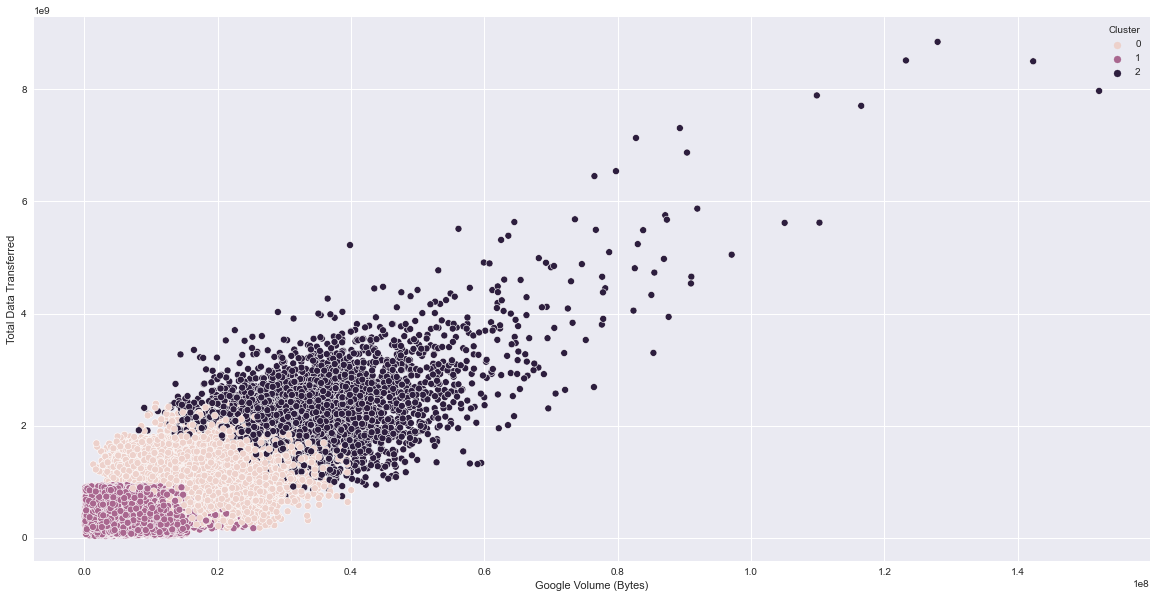

In [35]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.scatterplot(x="Google Volume (Bytes)", y="Total Data Transferred",hue = 'Cluster',  data=volume_per_user, ax=ax)

In [32]:
volume_per_user.loc[volume_per_user["Cluster"] == 0].describe()

,Session Count,Dur. (s),Total Data Transferred,Google Volume (Bytes),Netflix Volume (Bytes),Youtube Volume (Bytes),Gaming Volume (Bytes),Email Volume (Bytes),Social Media Volume (Bytes),Other Volume (Bytes),Cluster
count,23919.000000,2.391900e+04,2.391900e+04,2.391900e+04,2.391900e+04,2.391900e+04,2.391900e+04,2.391900e+04,2.391900e+04,2.391900e+04,23919.0
mean,2.149546,2.101956e+05,1.067213e+09,1.679806e+07,4.883919e+07,4.865772e+07,9.263737e+08,4.850963e+06,3.946304e+06,9.262862e+08,0.0
std,0.362217,1.417403e+05,3.605562e+08,5.677897e+06,1.541782e+07,1.540767e+07,3.548857e+08,1.714835e+06,1.604285e+06,3.785548e+08,0.0
min,1.000000,1.823500e+04,1.499216e+08,1.346703e+06,3.539613e+06,3.590164e+06,2.744256e+07,2.009670e+05,6.188200e+04,2.174717e+07,0.0
25%,2.000000,1.148250e+05,8.086749e+08,1.285364e+07,3.828915e+07,3.799416e+07,6.731326e+08,3.657096e+06,2.812508e+06,6.552540e+08,0.0
50%,2.000000,1.793740e+05,1.054405e+09,1.652648e+07,4.811411e+07,4.774661e+07,9.177390e+08,4.761876e+06,3.887424e+06,9.137507e+08,0.0
75%,2.000000,2.643920e+05,1.320084e+09,2.048411e+07,5.828947e+07,5.820948e+07,1.176557e+09,5.973320e+06,5.049400e+06,1.188371e+09,0.0
max,4.000000,3.174824e+06,2.484731e+09,4.067966e+07,1.174612e+08,1.221267e+08,2.314767e+09,1.286761e+07,1.029334e+07,2.419876e+09,0.0


In [33]:
volume_per_user.loc[volume_per_user["Cluster"] == 1].describe()

,Session Count,Dur. (s),Total Data Transferred,Google Volume (Bytes),Netflix Volume (Bytes),Youtube Volume (Bytes),Gaming Volume (Bytes),Email Volume (Bytes),Social Media Volume (Bytes),Other Volume (Bytes),Cluster
count,78425.000000,7.842500e+04,7.842500e+04,7.842500e+04,7.842500e+04,7.842500e+04,7.842500e+04,7.842500e+04,7.842500e+04,7.842500e+04,78425.0
mean,1.013350,1.049280e+05,4.968103e+08,7.875116e+06,2.279397e+07,2.286155e+07,4.307776e+08,2.279407e+06,1.842260e+06,4.319663e+08,1.0
std,0.114771,7.590870e+04,2.435852e+08,3.586273e+06,9.447638e+06,9.466179e+06,2.434077e+08,1.089054e+06,1.049169e+06,2.449863e+08,0.0
min,1.000000,7.142000e+03,3.324901e+07,4.033000e+04,1.845690e+05,7.890300e+04,3.063580e+05,1.817600e+04,1.563000e+03,1.490450e+05,1.0
25%,1.000000,5.522700e+04,2.875855e+08,4.976424e+06,1.604063e+07,1.608958e+07,2.208345e+08,1.366242e+06,9.374060e+05,2.202348e+08,1.0
50%,1.000000,8.640000e+04,4.980003e+08,7.857199e+06,2.273387e+07,2.281406e+07,4.319575e+08,2.285933e+06,1.833899e+06,4.314334e+08,1.0
75%,1.000000,1.394720e+05,7.064479e+08,1.073932e+07,2.942720e+07,2.954820e+07,6.413395e+08,3.176203e+06,2.744854e+06,6.426020e+08,1.0
max,2.000000,1.573420e+06,1.249265e+09,2.730780e+07,7.365738e+07,7.758650e+07,1.156491e+09,8.142171e+06,7.113142e+06,1.550645e+09,1.0


In [34]:
volume_per_user.loc[volume_per_user["Cluster"] == 2].describe()

,Session Count,Dur. (s),Total Data Transferred,Google Volume (Bytes),Netflix Volume (Bytes),Youtube Volume (Bytes),Gaming Volume (Bytes),Email Volume (Bytes),Social Media Volume (Bytes),Other Volume (Bytes),Cluster
count,4127.000000,4.127000e+03,4.127000e+03,4.127000e+03,4.127000e+03,4.127000e+03,4.127000e+03,4.127000e+03,4.127000e+03,4.127000e+03,4127.0
mean,4.269203,5.691696e+05,2.214151e+09,3.395817e+07,9.807662e+07,9.832247e+07,1.930811e+09,9.864392e+06,7.901125e+06,1.874953e+09,2.0
std,1.209102,6.611365e+05,7.036860e+08,1.153809e+07,3.203326e+07,3.246287e+07,6.524904e+08,3.440319e+06,2.966497e+06,6.765417e+08,0.0
min,3.000000,4.689600e+04,7.267267e+08,8.173290e+06,2.796669e+07,3.071486e+07,4.432449e+08,2.077731e+06,1.008465e+06,2.941545e+08,2.0
25%,4.000000,3.384705e+05,1.782096e+09,2.641754e+07,7.804008e+07,7.728276e+07,1.527137e+09,7.662606e+06,5.963616e+06,1.432863e+09,2.0
50%,4.000000,4.209500e+05,2.105378e+09,3.253123e+07,9.390728e+07,9.327669e+07,1.849267e+09,9.447561e+06,7.573685e+06,1.805594e+09,2.0
75%,5.000000,5.344775e+05,2.532861e+09,3.940349e+07,1.123733e+08,1.139741e+08,2.241068e+09,1.145303e+07,9.480738e+06,2.226471e+09,2.0
max,18.000000,1.855375e+07,8.846226e+09,1.521919e+08,3.995191e+08,4.529588e+08,7.749432e+09,4.241878e+07,4.337478e+07,8.167878e+09,2.0


In [35]:
volume_per_user.sample(5)

,MSISDN/Number,Session Count,Dur. (s),Total Data Transferred,Google Volume (Bytes),Netflix Volume (Bytes),Youtube Volume (Bytes),Gaming Volume (Bytes),Email Volume (Bytes),Social Media Volume (Bytes),Other Volume (Bytes),Cluster
802,33603363431.0,1,94079.0,696769178.0,3566384.0,30938914.0,22380875.0,627353965.0,1091985.0,614140.0,5.509894e+08,1
56267,33664493822.0,1,84944.0,68184917.0,7832969.0,16984274.0,10877583.0,28665492.0,538977.0,980328.0,3.894647e+08,1
76870,33677455906.0,1,38596.0,156852231.0,5014560.0,42816988.0,4155446.0,85315396.0,2715481.0,1538764.0,1.477867e+08,1
45304,33661754985.0,1,49344.0,797884421.0,9733226.0,28492298.0,13501738.0,728187473.0,3260497.0,2332150.0,2.040268e+08,1
64957,33667187498.0,2,172798.0,672146713.0,9613489.0,38285552.0,44936361.0,546782341.0,7291256.0,2823911.0,1.259319e+09,0


In [36]:
volume_per_user.sort_values(by="Google Volume (Bytes)", ascending=False)[:10]

,MSISDN/Number,Session Count,Dur. (s),Total Data Transferred,Google Volume (Bytes),Netflix Volume (Bytes),Youtube Volume (Bytes),Gaming Volume (Bytes),Email Volume (Bytes),Social Media Volume (Bytes),Other Volume (Bytes),Cluster
13468,33626320676.0,18,8791927.0,7.971167e+09,152191852.0,328725740.0,374483047.0,6.887572e+09,42418782.0,43374779.0,8.167878e+09,2
13124,33625779332.0,17,18553754.0,8.499621e+09,142307915.0,356980607.0,452958769.0,7.326673e+09,40633966.0,27135500.0,6.354583e+09,2
6405,33614892860.0,17,9966898.0,8.846226e+09,127973787.0,361401046.0,394370218.0,7.749432e+09,40788634.0,28294544.0,7.639264e+09,2
92586,33760536639.0,15,9279434.0,8.514774e+09,123223099.0,334643269.0,396289198.0,7.461045e+09,33693767.0,39783189.0,4.716134e+09,2
36910,33659725664.0,16,4035428.0,7.705863e+09,116516345.0,399519079.0,257991088.0,6.725559e+09,35999792.0,35412358.0,6.317415e+09,2
105758,33786323068.0,12,4059652.0,5.622232e+09,110254484.0,305939790.0,214763912.0,4.851096e+09,36310123.0,23974919.0,4.252487e+09,2
76078,33675877202.0,15,4865947.0,7.891111e+09,109860502.0,309093159.0,317410572.0,6.970568e+09,31514421.0,19222921.0,6.798515e+09,2
64884,33667163239.0,13,8744914.0,5.618394e+09,105032696.0,313939488.0,315231310.0,4.725622e+09,30335796.0,24247850.0,4.941519e+09,2
94310,33761268199.0,10,3481629.0,5.051114e+09,97089988.0,292091341.0,272789592.0,4.274099e+09,20753721.0,14496080.0,5.077779e+09,2
85997,33698756430.0,10,2061185.0,5.872263e+09,91935151.0,280812448.0,251422091.0,5.118380e+09,28439707.0,15496248.0,4.532624e+09,2


In [37]:
volume_per_user.sort_values(by="Netflix Volume (Bytes)", ascending=False)[:10]

,MSISDN/Number,Session Count,Dur. (s),Total Data Transferred,Google Volume (Bytes),Netflix Volume (Bytes),Youtube Volume (Bytes),Gaming Volume (Bytes),Email Volume (Bytes),Social Media Volume (Bytes),Other Volume (Bytes),Cluster
36910,33659725664.0,16,4035428.0,7.705863e+09,116516345.0,399519079.0,257991088.0,6.725559e+09,35999792.0,35412358.0,6.317415e+09,2
6405,33614892860.0,17,9966898.0,8.846226e+09,127973787.0,361401046.0,394370218.0,7.749432e+09,40788634.0,28294544.0,7.639264e+09,2
13124,33625779332.0,17,18553754.0,8.499621e+09,142307915.0,356980607.0,452958769.0,7.326673e+09,40633966.0,27135500.0,6.354583e+09,2
92586,33760536639.0,15,9279434.0,8.514774e+09,123223099.0,334643269.0,396289198.0,7.461045e+09,33693767.0,39783189.0,4.716134e+09,2
13468,33626320676.0,18,8791927.0,7.971167e+09,152191852.0,328725740.0,374483047.0,6.887572e+09,42418782.0,43374779.0,8.167878e+09,2
92241,33760413819.0,12,5321667.0,7.132371e+09,82738720.0,318347546.0,303169107.0,6.268620e+09,25576965.0,20777205.0,4.101645e+09,2
64884,33667163239.0,13,8744914.0,5.618394e+09,105032696.0,313939488.0,315231310.0,4.725622e+09,30335796.0,24247850.0,4.941519e+09,2
76078,33675877202.0,15,4865947.0,7.891111e+09,109860502.0,309093159.0,317410572.0,6.970568e+09,31514421.0,19222921.0,6.798515e+09,2
105758,33786323068.0,12,4059652.0,5.622232e+09,110254484.0,305939790.0,214763912.0,4.851096e+09,36310123.0,23974919.0,4.252487e+09,2
94310,33761268199.0,10,3481629.0,5.051114e+09,97089988.0,292091341.0,272789592.0,4.274099e+09,20753721.0,14496080.0,5.077779e+09,2


In [38]:
volume_per_user.sort_values(by="Youtube Volume (Bytes)", ascending=False)[:10]

,MSISDN/Number,Session Count,Dur. (s),Total Data Transferred,Google Volume (Bytes),Netflix Volume (Bytes),Youtube Volume (Bytes),Gaming Volume (Bytes),Email Volume (Bytes),Social Media Volume (Bytes),Other Volume (Bytes),Cluster
13124,33625779332.0,17,18553754.0,8.499621e+09,142307915.0,356980607.0,452958769.0,7.326673e+09,40633966.0,27135500.0,6.354583e+09,2
92586,33760536639.0,15,9279434.0,8.514774e+09,123223099.0,334643269.0,396289198.0,7.461045e+09,33693767.0,39783189.0,4.716134e+09,2
6405,33614892860.0,17,9966898.0,8.846226e+09,127973787.0,361401046.0,394370218.0,7.749432e+09,40788634.0,28294544.0,7.639264e+09,2
13468,33626320676.0,18,8791927.0,7.971167e+09,152191852.0,328725740.0,374483047.0,6.887572e+09,42418782.0,43374779.0,8.167878e+09,2
76078,33675877202.0,15,4865947.0,7.891111e+09,109860502.0,309093159.0,317410572.0,6.970568e+09,31514421.0,19222921.0,6.798515e+09,2
64884,33667163239.0,13,8744914.0,5.618394e+09,105032696.0,313939488.0,315231310.0,4.725622e+09,30335796.0,24247850.0,4.941519e+09,2
13935,33627080969.0,12,4703516.0,5.754731e+09,87125921.0,267040897.0,308790774.0,4.972353e+09,23567219.0,17808911.0,5.117791e+09,2
92241,33760413819.0,12,5321667.0,7.132371e+09,82738720.0,318347546.0,303169107.0,6.268620e+09,25576965.0,20777205.0,4.101645e+09,2
86139,33698792269.0,11,5169128.0,6.540899e+09,79736125.0,268247480.0,302661958.0,5.753743e+09,29059042.0,15728161.0,4.689876e+09,2
659,33603127838.0,12,6287761.0,4.976195e+09,86929016.0,260488421.0,284090139.0,4.191445e+09,26198895.0,23077825.0,6.326671e+09,2


In [39]:
volume_per_user.sort_values(by="Gaming Volume (Bytes)", ascending=False)[:10]

,MSISDN/Number,Session Count,Dur. (s),Total Data Transferred,Google Volume (Bytes),Netflix Volume (Bytes),Youtube Volume (Bytes),Gaming Volume (Bytes),Email Volume (Bytes),Social Media Volume (Bytes),Other Volume (Bytes),Cluster
6405,33614892860.0,17,9966898.0,8.846226e+09,127973787.0,361401046.0,394370218.0,7.749432e+09,40788634.0,28294544.0,7.639264e+09,2
92586,33760536639.0,15,9279434.0,8.514774e+09,123223099.0,334643269.0,396289198.0,7.461045e+09,33693767.0,39783189.0,4.716134e+09,2
13124,33625779332.0,17,18553754.0,8.499621e+09,142307915.0,356980607.0,452958769.0,7.326673e+09,40633966.0,27135500.0,6.354583e+09,2
76078,33675877202.0,15,4865947.0,7.891111e+09,109860502.0,309093159.0,317410572.0,6.970568e+09,31514421.0,19222921.0,6.798515e+09,2
13468,33626320676.0,18,8791927.0,7.971167e+09,152191852.0,328725740.0,374483047.0,6.887572e+09,42418782.0,43374779.0,8.167878e+09,2
36910,33659725664.0,16,4035428.0,7.705863e+09,116516345.0,399519079.0,257991088.0,6.725559e+09,35999792.0,35412358.0,6.317415e+09,2
62805,33666464084.0,11,4536757.0,7.308501e+09,89320737.0,214416926.0,227336012.0,6.646303e+09,25557139.0,18629986.0,4.349141e+09,2
92241,33760413819.0,12,5321667.0,7.132371e+09,82738720.0,318347546.0,303169107.0,6.268620e+09,25576965.0,20777205.0,4.101645e+09,2
57033,33664712899.0,11,2927785.0,6.872018e+09,90389372.0,251798809.0,276834013.0,6.103856e+09,21426007.0,19390599.0,3.976960e+09,2
86139,33698792269.0,11,5169128.0,6.540899e+09,79736125.0,268247480.0,302661958.0,5.753743e+09,29059042.0,15728161.0,4.689876e+09,2


In [40]:
volume_per_user.sort_values(by="Email Volume (Bytes)", ascending=False)[:10]

,MSISDN/Number,Session Count,Dur. (s),Total Data Transferred,Google Volume (Bytes),Netflix Volume (Bytes),Youtube Volume (Bytes),Gaming Volume (Bytes),Email Volume (Bytes),Social Media Volume (Bytes),Other Volume (Bytes),Cluster
13468,33626320676.0,18,8791927.0,7.971167e+09,152191852.0,328725740.0,374483047.0,6.887572e+09,42418782.0,43374779.0,8.167878e+09,2
6405,33614892860.0,17,9966898.0,8.846226e+09,127973787.0,361401046.0,394370218.0,7.749432e+09,40788634.0,28294544.0,7.639264e+09,2
13124,33625779332.0,17,18553754.0,8.499621e+09,142307915.0,356980607.0,452958769.0,7.326673e+09,40633966.0,27135500.0,6.354583e+09,2
105758,33786323068.0,12,4059652.0,5.622232e+09,110254484.0,305939790.0,214763912.0,4.851096e+09,36310123.0,23974919.0,4.252487e+09,2
36910,33659725664.0,16,4035428.0,7.705863e+09,116516345.0,399519079.0,257991088.0,6.725559e+09,35999792.0,35412358.0,6.317415e+09,2
92586,33760536639.0,15,9279434.0,8.514774e+09,123223099.0,334643269.0,396289198.0,7.461045e+09,33693767.0,39783189.0,4.716134e+09,2
76078,33675877202.0,15,4865947.0,7.891111e+09,109860502.0,309093159.0,317410572.0,6.970568e+09,31514421.0,19222921.0,6.798515e+09,2
59873,33665460546.0,9,2566292.0,5.388631e+09,63597426.0,197517914.0,232292532.0,4.781003e+09,30417885.0,10554843.0,2.973452e+09,2
64884,33667163239.0,13,8744914.0,5.618394e+09,105032696.0,313939488.0,315231310.0,4.725622e+09,30335796.0,24247850.0,4.941519e+09,2
86139,33698792269.0,11,5169128.0,6.540899e+09,79736125.0,268247480.0,302661958.0,5.753743e+09,29059042.0,15728161.0,4.689876e+09,2


In [41]:
volume_per_user.sort_values(by="Social Media Volume (Bytes)", ascending=False)[:10]

,MSISDN/Number,Session Count,Dur. (s),Total Data Transferred,Google Volume (Bytes),Netflix Volume (Bytes),Youtube Volume (Bytes),Gaming Volume (Bytes),Email Volume (Bytes),Social Media Volume (Bytes),Other Volume (Bytes),Cluster
13468,33626320676.0,18,8791927.0,7.971167e+09,152191852.0,328725740.0,374483047.0,6.887572e+09,42418782.0,43374779.0,8.167878e+09,2
92586,33760536639.0,15,9279434.0,8.514774e+09,123223099.0,334643269.0,396289198.0,7.461045e+09,33693767.0,39783189.0,4.716134e+09,2
36910,33659725664.0,16,4035428.0,7.705863e+09,116516345.0,399519079.0,257991088.0,6.725559e+09,35999792.0,35412358.0,6.317415e+09,2
6405,33614892860.0,17,9966898.0,8.846226e+09,127973787.0,361401046.0,394370218.0,7.749432e+09,40788634.0,28294544.0,7.639264e+09,2
13124,33625779332.0,17,18553754.0,8.499621e+09,142307915.0,356980607.0,452958769.0,7.326673e+09,40633966.0,27135500.0,6.354583e+09,2
64884,33667163239.0,13,8744914.0,5.618394e+09,105032696.0,313939488.0,315231310.0,4.725622e+09,30335796.0,24247850.0,4.941519e+09,2
105758,33786323068.0,12,4059652.0,5.622232e+09,110254484.0,305939790.0,214763912.0,4.851096e+09,36310123.0,23974919.0,4.252487e+09,2
70706,33669068942.0,11,610801.0,3.906542e+09,77824684.0,212009030.0,236402804.0,3.269152e+09,22923413.0,23800834.0,4.605369e+09,2
659,33603127838.0,12,6287761.0,4.976195e+09,86929016.0,260488421.0,284090139.0,4.191445e+09,26198895.0,23077825.0,6.326671e+09,2
31202,33658490784.0,9,3061779.0,2.690139e+09,76434143.0,186793931.0,183264219.0,2.125069e+09,19677691.0,23000066.0,4.315511e+09,2


In [42]:
volume_per_user.sort_values(by="Other Volume (Bytes)", ascending=False)[:10]

,MSISDN/Number,Session Count,Dur. (s),Total Data Transferred,Google Volume (Bytes),Netflix Volume (Bytes),Youtube Volume (Bytes),Gaming Volume (Bytes),Email Volume (Bytes),Social Media Volume (Bytes),Other Volume (Bytes),Cluster
13468,33626320676.0,18,8791927.0,7.971167e+09,152191852.0,328725740.0,374483047.0,6.887572e+09,42418782.0,43374779.0,8.167878e+09,2
6405,33614892860.0,17,9966898.0,8.846226e+09,127973787.0,361401046.0,394370218.0,7.749432e+09,40788634.0,28294544.0,7.639264e+09,2
76078,33675877202.0,15,4865947.0,7.891111e+09,109860502.0,309093159.0,317410572.0,6.970568e+09,31514421.0,19222921.0,6.798515e+09,2
13124,33625779332.0,17,18553754.0,8.499621e+09,142307915.0,356980607.0,452958769.0,7.326673e+09,40633966.0,27135500.0,6.354583e+09,2
659,33603127838.0,12,6287761.0,4.976195e+09,86929016.0,260488421.0,284090139.0,4.191445e+09,26198895.0,23077825.0,6.326671e+09,2
36910,33659725664.0,16,4035428.0,7.705863e+09,116516345.0,399519079.0,257991088.0,6.725559e+09,35999792.0,35412358.0,6.317415e+09,2
13878,33626948251.0,10,2415036.0,4.825638e+09,69987947.0,262722069.0,200085240.0,4.181763e+09,17482788.0,16922002.0,5.305448e+09,2
13935,33627080969.0,12,4703516.0,5.754731e+09,87125921.0,267040897.0,308790774.0,4.972353e+09,23567219.0,17808911.0,5.117791e+09,2
94310,33761268199.0,10,3481629.0,5.051114e+09,97089988.0,292091341.0,272789592.0,4.274099e+09,20753721.0,14496080.0,5.077779e+09,2
30592,33658361927.0,10,2131710.0,6.452398e+09,76507138.0,264142078.0,260989846.0,5.705920e+09,19682048.0,17285759.0,5.013651e+09,2


In [43]:
top_3_applications = volume_per_user[["Google Volume (Bytes)", "Netflix Volume (Bytes)", "Email Volume (Bytes)", "Youtube Volume (Bytes)", "Gaming Volume (Bytes)", "Social Media Volume (Bytes)", "Other Volume (Bytes)"]].sum().nlargest(3)

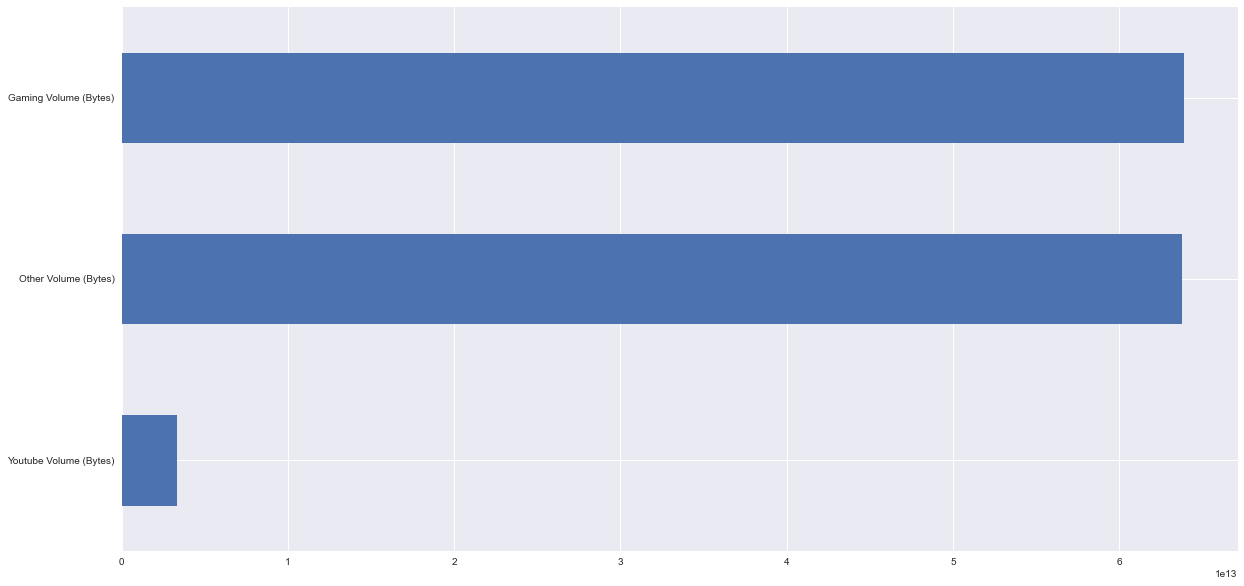

In [44]:
top_3_applications.plot(kind="barh", figsize=(20, 10)).invert_yaxis()

Optimal K using elbow method

In [45]:
distortions = []

for k in range(1,10):
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df_norm)
    distortions.append(kmeanModel.inertia_)

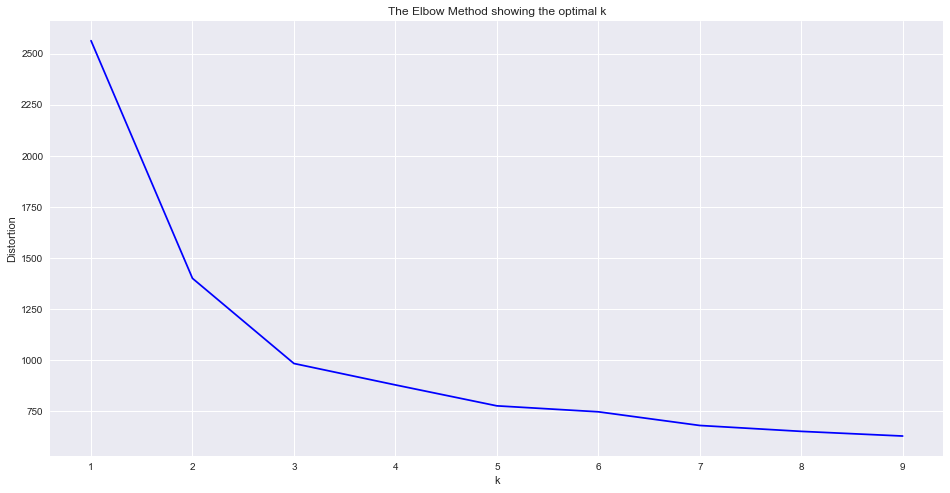

In [46]:
plt.figure(figsize=(16,8))
plt.plot(range(1,10), distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

We can see that the “elbow” is the number 3 which is optimal for this case

In [36]:
volume_per_user.to_csv(data_dir / "volume_per_user_clustered.csv", index=False)